In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [2]:
data = pd.read_csv('/Users/kscomputer/Desktop/Project_1/Project_1/output_data/oxford_clean3.csv')
data.head()

,CountryName,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,E3_Fiscal_measures,H6_Facial_coverings,ConfirmedCases,ConfirmedDeaths
0,Brazil,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Brazil,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Brazil,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brazil,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Brazil,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
info = pd.DataFrame(data, columns= ["CountryName", "Date", "C1_School_closing", "C2_Workplace_closing",
                                         "C6_Stay_home_requirements", "E1_Income_support",
                                    "H6_Facial_coverings"])

In [4]:
info.head()

,CountryName,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,H6_Facial_coverings
0,Brazil,20200101,0.0,0.0,0.0,0.0,0.0
1,Brazil,20200102,0.0,0.0,0.0,0.0,0.0
2,Brazil,20200103,0.0,0.0,0.0,0.0,0.0
3,Brazil,20200104,0.0,0.0,0.0,0.0,0.0
4,Brazil,20200105,0.0,0.0,0.0,0.0,0.0


In [5]:
info = info.astype({'C1_School_closing': 'int', 'C2_Workplace_closing': 'int', 
                    'C6_Stay_home_requirements': 'int', 'E1_Income_support':'int',
                            'H6_Facial_coverings': 'int'}) 

In [6]:
info['Date'] = pd.to_datetime(info['Date'], format='%Y%m%d')
info.dropna()

,CountryName,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,H6_Facial_coverings
0,Brazil,2020-01-01,0,0,0,0,0
1,Brazil,2020-01-02,0,0,0,0,0
2,Brazil,2020-01-03,0,0,0,0,0
3,Brazil,2020-01-04,0,0,0,0,0
4,Brazil,2020-01-05,0,0,0,0,0
...,...,...,...,...,...,...,...
2405,United States,2020-10-21,3,2,2,2,4
2406,United States,2020-10-22,3,2,2,2,4
2407,United States,2020-10-23,3,2,2,2,4
2408,United States,2020-10-24,3,2,2,2,4


In [7]:
#transpose the .describe  so I can run mean on 50% column to find what countries issued relaxed mandates and which had strict mandates
info.describe().T

,count,mean,std,min,25%,50%,75%,max
C1_School_closing,2410.0,1.697095,1.305365,0.0,0.0,2.0,3.0,3.0
C2_Workplace_closing,2410.0,1.480083,1.184784,0.0,0.0,2.0,3.0,3.0
C6_Stay_home_requirements,2410.0,0.966805,1.034351,0.0,0.0,1.0,2.0,3.0
E1_Income_support,2410.0,1.091701,0.803876,0.0,0.0,1.0,2.0,2.0
H6_Facial_coverings,2410.0,1.462241,1.609832,0.0,0.0,1.0,3.0,4.0


In [8]:
#everything below 1.4 is relaxed mandate country. everything above is strict country
info_mean = info.describe().T['50%'].mean()
info_mean

1.4

In [9]:
#brazil country by itself
brazil = info.loc[info['CountryName']=='Brazil']
brazil_mean = brazil.mean()
brazil_mean
brazil_sum = brazil_mean.sum()
brazil_sum
brazil_total = (brazil_sum/5)

brazil_total

brazil_school=brazil['C1_School_closing'].mean()
brazil_work=brazil['C2_Workplace_closing'].mean()
brazil_home=brazil['C6_Stay_home_requirements'].mean()
brazil_sup = brazil['E1_Income_support'].mean()
brazil_cover = brazil['H6_Facial_coverings'].mean()

brazil_sum = {'Brazil School':[brazil_school],'Brazil Work':[brazil_work],
          'Brazil Home':[brazil_home],'Brazil Support':[brazil_sup],
           'Brazil Face Cover':[brazil_cover]}

brazil_df = pd.DataFrame(index=['Country'],data=brazil_sum)
brazil_df

,Brazil School,Brazil Work,Brazil Home,Brazil Support,Brazil Face Cover
Country,2.294702,2.082781,1.370861,0.695364,2.860927


In [10]:
china = info.loc[info['CountryName']=='China']
china_mean = china.mean()
china_mean
china_sum = china_mean.sum()
china_sum
china_total = (china_sum/5)

china_total

china_school=china['C1_School_closing'].mean()
china_work=china['C2_Workplace_closing'].mean()
china_home=china['C6_Stay_home_requirements'].mean()
china_sup = china['E1_Income_support'].mean()
china_cover = china['H6_Facial_coverings'].mean()

china_sum = {'China School':[china_school],'China Work':[china_work],
          'China Home':[china_home],'China Support':[china_sup],
           'China Face Cover':[china_cover]}

china_df = pd.DataFrame(index=['Country'],data=china_sum)
china_df

,China School,China Work,China Home,China Support,China Face Cover
Country,2.257426,2.521452,2.353135,0.666667,2.178218


In [11]:
uk = info.loc[info['CountryName']=='United Kingdom']
uk_mean = uk.mean()
uk_mean
uk_sum = uk_mean.sum()
uk_sum
uk_total = (uk_sum/5)

uk_total

uk_school=uk['C1_School_closing'].mean()
uk_work=uk['C2_Workplace_closing'].mean()
uk_home=uk['C6_Stay_home_requirements'].mean()
uk_sup = uk['E1_Income_support'].mean()
uk_cover = uk['H6_Facial_coverings'].mean()

uk_sum = {'Uk School':[uk_school],'Uk Work':[uk_work],
          'Uk Home':[uk_home],'UK Support':[uk_sup],
           'Uk Face Cover':[uk_cover]}

uk_df = pd.DataFrame(index=['Country'],data=uk_sum)
uk_df

,Uk School,Uk Work,Uk Home,UK Support,Uk Face Cover
Country,1.875817,1.683007,0.970588,1.48366,0.480392


In [12]:
italy = info.loc[info['CountryName']=='Italy']
italy_mean = italy.mean()
italy_mean
italy_sum = italy_mean.sum()
italy_sum
italy_total = (italy_sum/5)

italy_total

italy_school=italy['C1_School_closing'].mean()
italy_work=italy['C2_Workplace_closing'].mean()
italy_home=italy['C6_Stay_home_requirements'].mean()
italy_sup = italy['E1_Income_support'].mean()
italy_cover = italy['H6_Facial_coverings'].mean()

italy_sum = {'Italy School':[italy_school],'Italy Work':[italy_work],
           'Italy Home':[italy_home],'Italy Support':[italy_sup],
           'Italy Face Cover':[italy_cover]}

italy_df = pd.DataFrame(index=['Country'],data=italy_sum)
italy_df

,Italy School,Italy Work,Italy Home,Italy Support,Italy Face Cover
Country,2.199324,1.780405,0.834459,0.743243,2.672297


In [13]:
japan = info.loc[info['CountryName']=='Japan']
japan_mean = japan.mean()
japan_mean
japan_sum = japan_mean.sum()
japan_sum
japan_total = (japan_sum/5)

japan_total

japan_school=japan['C1_School_closing'].mean()
japan_work=japan['C2_Workplace_closing'].mean()
japan_home=japan['C6_Stay_home_requirements'].mean()
japan_sup = japan['E1_Income_support'].mean()
japan_cover = japan['H6_Facial_coverings'].mean()

japan_sum = {'Japan School':[japan_school],'Japan Work':[japan_work],
           'Japan Home':[japan_home],'Japan Support':[japan_sup],
           'Japan Face Cover':[japan_cover]}

japan_df = pd.DataFrame(index=['Country'],data=japan_sum)
japan_df

,Japan School,Japan Work,Japan Home,Japan Support,Japan Face Cover
Country,1.394137,0.618893,0.491857,0.654723,0.80456


In [14]:
nz = info.loc[info['CountryName']=='New Zealand']
nz_mean = nz.mean()
nz_mean
nz_sum = nz_mean.sum()
nz_sum
nz_total = (nz_sum/5)

nz_total

nz_school=nz['C1_School_closing'].mean()
nz_work=nz['C2_Workplace_closing'].mean()
nz_home=nz['C6_Stay_home_requirements'].mean()
nz_sup = nz['E1_Income_support'].mean()
nz_cover = nz['H6_Facial_coverings'].mean()

nz_sum = {'NZ School':[nz_school],'NZ Work':[nz_work],
           'NZ Home':[nz_home],'NZ Support':[nz_sup],
           'NZ Face Cover':[nz_cover]}

nz_df = pd.DataFrame(index=['Country'],data=nz_sum)
nz_df

,NZ School,NZ Work,NZ Home,NZ Support,NZ Face Cover
Country,0.750842,0.6633,0.484848,1.542088,0.40404


In [15]:
meatball = info.loc[info['CountryName']=='Sweden']

meatball_mean = meatball.mean()
meatball_mean
meatball_sum = meatball_mean.sum()
meatball_sum
meatball_total = (meatball_sum/5)

meatball_total

meatball_school=meatball['C1_School_closing'].mean()
meatball_work=meatball['C2_Workplace_closing'].mean()
meatball_home=meatball['C6_Stay_home_requirements'].mean()
meatball_sup = meatball['E1_Income_support'].mean()
meatball_cover = meatball['H6_Facial_coverings'].mean()

meat_sum = {'Sweden School':[meatball_school],'Sweden Work':[meatball_work],
           'Sweden Home':[meatball_home],'Sweden Support':[meatball_sup],
           'Sweden Face Cover':[meatball_cover]}

meatball_df = pd.DataFrame(index=['Country'],data=meat_sum)
meatball_df

,Sweden School,Sweden Work,Sweden Home,Sweden Support,Sweden Face Cover
Country,0.448505,0.72093,0.0,1.534884,0.0


In [16]:
us = info.loc[info['CountryName']=='United States']
us

us_mean = us.mean()
us_mean
us_sum = us_mean.sum()
us_sum
us_total = (us_sum/5)

us_total
#another way to see the five numbers before the total of us total is found
us_school=us['C1_School_closing'].mean()
us_work=us['C2_Workplace_closing'].mean()
us_home=us['C6_Stay_home_requirements'].mean()
us_sup = us['E1_Income_support'].mean()
us_cover = us['H6_Facial_coverings'].mean()

us_sum = {'US School':[us_school],'US Work':[us_work],
           'US Home':[us_home],'US Support':[us_sup],
           'US Face Cover':[us_cover]}

us_df = pd.DataFrame(index=['Country'],data=us_sum)
us_df

,US School,US Work,US Home,US Support,US Face Cover
Country,2.355705,1.771812,1.221477,1.422819,2.332215


In [17]:
total = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                   ,'Japan','New Zealand','Sweden'],
         'Average Mandate':[china_total, brazil_total, us_total, italy_total,
                           uk_total,japan_total, nz_total, meatball_total]}


sum_df = pd.DataFrame(total)

sum_df

,Country,Average Mandate
0,China,1.995380
1,Brazil,1.860927
2,United States,1.820805
3,Italy,1.645946
4,United Kingdom,1.298693
5,Japan,0.792834
6,New Zealand,0.769024
7,Sweden,0.540864


In [18]:
#1.4 was the mean of the 50% column above on .describe(), making the df below the Strict countries
strict_df = sum_df.loc[sum_df['Average Mandate']>=1.4]
strict_df

,Country,Average Mandate
0,China,1.995380
1,Brazil,1.860927
2,United States,1.820805
3,Italy,1.645946


In [19]:
##1.4 was the mean of the 50% column above on .describe(), making the df below the relax countries
lax_df = sum_df.loc[sum_df['Average Mandate']<=1.4]
lax_df

,Country,Average Mandate
4,United Kingdom,1.298693
5,Japan,0.792834
6,New Zealand,0.769024
7,Sweden,0.540864


In [20]:
brazil= data.loc[data['CountryName']=='Brazil']
brazil_max = brazil['ConfirmedCases'].max()
brazil_max

5439641.0

In [21]:
china= data.loc[data['CountryName']=='China']
china_max = china['ConfirmedCases'].max()
china_max

91241.0

In [22]:
us= data.loc[data['CountryName']=='United States']
us_max = us['ConfirmedCases'].max()
us_max

8576725.0

In [23]:
italy= data.loc[data['CountryName']=='Italy']
italy_max = italy['ConfirmedCases'].max()
italy_max

449648.0

In [24]:
uk= data.loc[data['CountryName']=='United Kingdom']
uk_max = uk['ConfirmedCases'].max()
uk_max

1034914.0

In [25]:
japan= data.loc[data['CountryName']=='Japan']
japan_max = japan['ConfirmedCases'].max()
japan_max

101813.0

In [26]:
nz= data.loc[data['CountryName']=='New Zealand']
nz_max = nz['ConfirmedCases'].max()
nz_max

1603.0

In [27]:
meatball= data.loc[data['CountryName']=='Sweden']
meatball_max = meatball['ConfirmedCases'].max()
meatball_max

115927.0

In [28]:
totals = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                   ,'Japan','New Zealand','Sweden'],
         'Confirmed Cases':[china_max, brazil_max, us_max, italy_max,
                           uk_max,japan_max, nz_max, meatball_max]}


totals_df = pd.DataFrame(totals)

totals_df

,Country,Confirmed Cases
0,China,91241.0
1,Brazil,5439641.0
2,United States,8576725.0
3,Italy,449648.0
4,United Kingdom,1034914.0
5,Japan,101813.0
6,New Zealand,1603.0
7,Sweden,115927.0


In [29]:
strict_max = totals_df.loc[totals_df['Country'].isin(['China','Brazil','United States','Italy'])]
strict_max

,Country,Confirmed Cases
0,China,91241.0
1,Brazil,5439641.0
2,United States,8576725.0
3,Italy,449648.0


In [30]:
lax_max = totals_df.loc[totals_df['Country'].isin(['United Kingdom','Japan','New Zealand','Sweden'])]
lax_max

,Country,Confirmed Cases
4,United Kingdom,1034914.0
5,Japan,101813.0
6,New Zealand,1603.0
7,Sweden,115927.0


In [31]:
brazil= data.loc[data['CountryName']=='Brazil']
brazil_d = brazil['ConfirmedDeaths'].max()
brazil_d

157946.0

In [32]:
china= data.loc[data['CountryName']=='China']
china_d = china['ConfirmedDeaths'].max()
china_d

4739.0

In [33]:
us= data.loc[data['CountryName']=='United States']
us_d = us['ConfirmedDeaths'].max()
us_d

224899.0

In [34]:
italy= data.loc[data['CountryName']=='Italy']
italy_d = italy['ConfirmedDeaths'].max()
italy_d

36832.0

In [35]:
uk= data.loc[data['CountryName']=='United Kingdom']
uk_d = uk['ConfirmedDeaths'].max()
uk_d

46717.0

In [36]:
japan= data.loc[data['CountryName']=='Japan']
japan_d = japan['ConfirmedDeaths'].max()
japan_d

1774.0

In [37]:
nz= data.loc[data['CountryName']=='New Zealand']
nz_d = nz['ConfirmedDeaths'].max()
nz_d

25.0

In [38]:
meatball= data.loc[data['CountryName']=='Sweden']
meatball_d = meatball['ConfirmedDeaths'].max()
meatball_d

5936.0

In [39]:
total_d = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                   ,'Japan','New Zealand','Sweden'],
         'Confirmed Deaths':[china_d, brazil_d, us_d, italy_d,
                           uk_d,japan_d, nz_d, meatball_d]}


death_df = pd.DataFrame(total_d)
death_df

,Country,Confirmed Deaths
0,China,4739.0
1,Brazil,157946.0
2,United States,224899.0
3,Italy,36832.0
4,United Kingdom,46717.0
5,Japan,1774.0
6,New Zealand,25.0
7,Sweden,5936.0


In [40]:
strict_d = death_df.loc[death_df['Country'].isin(['China','Brazil','United States','Italy'])]
strict_d

,Country,Confirmed Deaths
0,China,4739.0
1,Brazil,157946.0
2,United States,224899.0
3,Italy,36832.0


In [41]:
lax_d = death_df.loc[death_df['Country'].isin(['United Kingdom','Japan','New Zealand','Sweden'])]
lax_d

,Country,Confirmed Deaths
4,United Kingdom,46717.0
5,Japan,1774.0
6,New Zealand,25.0
7,Sweden,5936.0


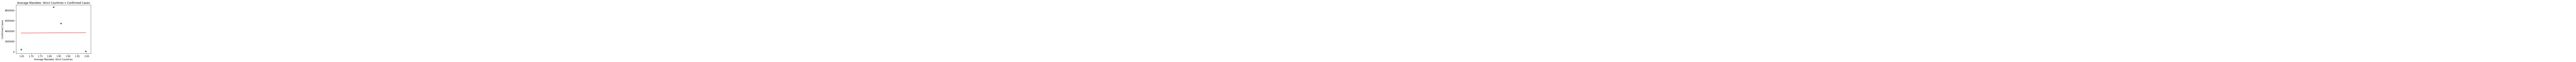

In [42]:
#linear regression strict mandates v strict cases
x_values = strict_df['Average Mandate']
y_values = strict_max['Confirmed Cases']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Strict Countries v Confirmed Cases')
plt.xlabel('Average Mandate: Strict Countries')
plt.ylabel('Confirmed Cases')
plt.show()

In [43]:
#pearsonr for strict mandates v strict cases
correlation = st.pearsonr(strict_df['Average Mandate'], strict_max['Confirmed Cases'])
correlation

(0.005969848828868585, 0.9940301511711314)

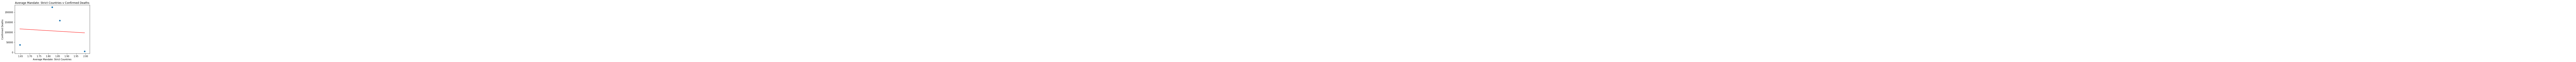

In [44]:
x_values = strict_df['Average Mandate']
y_values = strict_d['Confirmed Deaths']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Strict Countries v Confirmed Deaths')
plt.xlabel('Average Mandate: Strict Countries')
plt.ylabel('Confirmed Deaths')
plt.show()

In [47]:
correlation = st.pearsonr(strict_df['Average Mandate'], strict_d['Confirmed Deaths'])
correlation

(-0.07862970050620083, 0.9213702994937991)

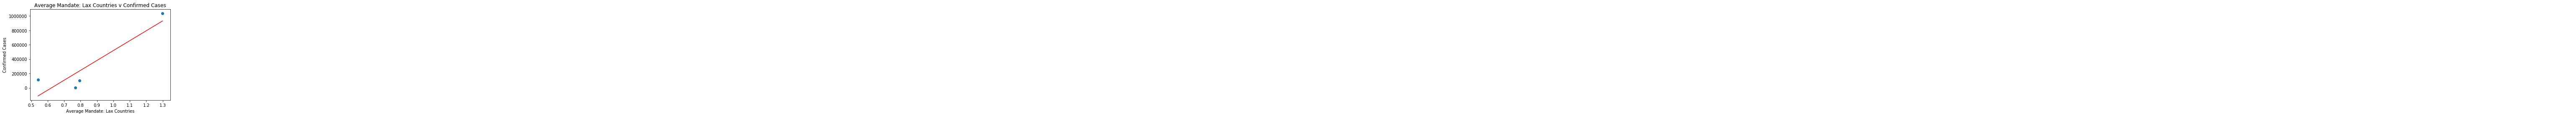

In [45]:
x_values = lax_df['Average Mandate']
y_values = lax_max['Confirmed Cases']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Lax Countries v Confirmed Cases')
plt.xlabel('Average Mandate: Lax Countries')
plt.ylabel('Confirmed Cases')
plt.show()

In [48]:
correlation = st.pearsonr(lax_df['Average Mandate'], lax_max['Confirmed Cases'])
correlation

(0.9100025559884284, 0.08999744401157161)

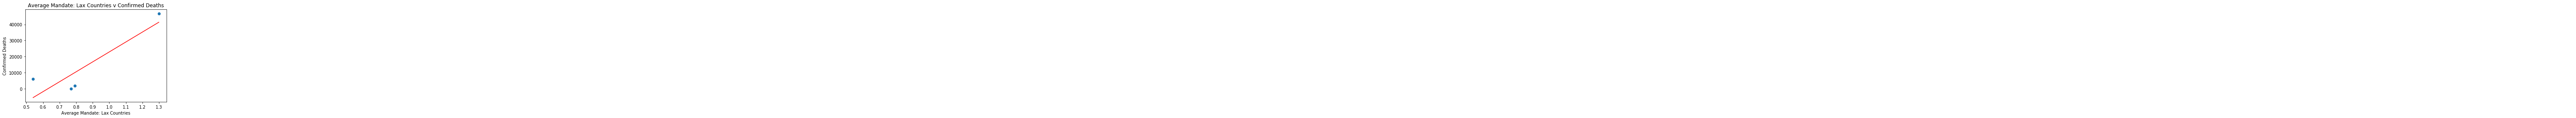

In [46]:
x_values = lax_df['Average Mandate']
y_values = lax_d['Confirmed Deaths']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Lax Countries v Confirmed Deaths')
plt.xlabel('Average Mandate: Lax Countries')
plt.ylabel('Confirmed Deaths')
plt.show()

In [49]:
correlation = st.pearsonr(lax_df['Average Mandate'], lax_d['Confirmed Deaths'])
correlation

(0.8920745759776135, 0.10792542402238647)